In [3]:
import pandas as pd

full_df = pd.read_feather('../data/data.feather')

In [5]:
q_df = full_df.filter(regex='^q\d+')
dummies_df = pd.get_dummies(q_df, dummy_na=False) # USE FALSE TruncatedSVD can handle missing data
dummies_df.shape

(68371, 7338)

In [10]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=4)
latent_features = svd.fit_transform(dummies_df)

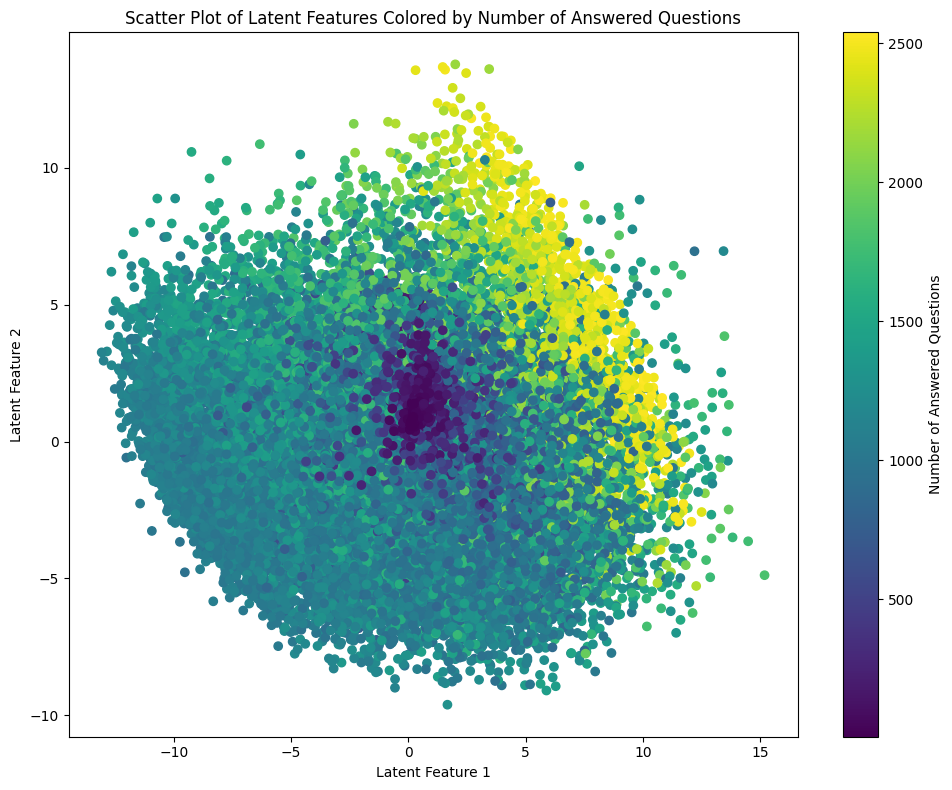

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

n_answered = full_df.filter(regex="^q\d+").notna().sum(axis=1)

# Assuming dummies_df and latent_features are already defined
# and n_answered is a pandas Series

plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_features[:, 2], latent_features[:, 3], c=n_answered, cmap='viridis')
cbar = plt.colorbar(scatter)
cbar.set_label('Number of Answered Questions')
plt.xlabel('Latent Feature 1')
plt.ylabel('Latent Feature 2')
plt.title('Scatter Plot of Latent Features Colored by Number of Answered Questions')
plt.tight_layout()
plt.show()